# Joining Dataframes

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [34]:
df_1 = pd.DataFrame({'name': ['John', 'George', 'Ringo'],
                     'color': ['Blue', 'Blue', 'Purple']
                     })


df_2 = pd.DataFrame({'name': ['Paul', 'George', 'Ringo'],
                     'carcolor': ['Red', 'Blue', np.nan]},
                     index=[3, 1, 2]
                    )

## Using Concat: adding rows

The `concat` function in the pandas library accepts a list of `dataframes` to combine. This function
is useful when you have multiple files that you want to combine into one `dataframe`. It will find
any columns that have the same name and use a single column for each of the repeated columns.


In [35]:
pd.concat([df_1, df_2])

,name,color,carcolor
0,John,Blue,NaN
1,George,Blue,NaN
2,Ringo,Purple,NaN
3,Paul,NaN,Red
1,George,NaN,Blue
2,Ringo,NaN,NaN


## Using Concat: adding columns

The `concat` function also can align dataframes based on the index values, rather than using the
columns. If you set axis=1, we get this behavior. I do not use this operation often, rather I use
`.assign` to create columns.

In [36]:
pd.concat([df_1, df_2], axis=1)

,name,color,name,carcolor
0,John,Blue,NaN,NaN
1,George,Blue,George,Blue
2,Ringo,Purple,Ringo,NaN
3,NaN,NaN,Paul,Red


### Joins

Databases have different types of joins. The four common ones include `inner`, `outer`, `left`, and `right`. The dataframe has two methods to support these operations, `.join` and `.merge`. 

In [37]:
(
    df_1
    .merge(
            df_2
            .assign(name=df_2['name'])
          )
)

,name,color,carcolor
0,George,Blue,Blue
1,Ringo,Purple,NaN


> The default join type for the `.merge` method is an inner join. The `.merge` method looks for common column names in the dataframe it is going to join. The method aligns the values in those columns. If both columns have values that are the same, they are kept along with the remaining columns from both data frames. Rows with values in the aligned columns that only appear in one data
frame are discarded:

In [38]:
df_1.merge(df_2)

,name,color,carcolor
0,George,Blue,Blue
1,Ringo,Purple,NaN


In [39]:
df_1.merge(df_2, how='outer')

,name,color,carcolor
0,John,Blue,NaN
1,George,Blue,Blue
2,Ringo,Purple,NaN
3,Paul,NaN,Red


> If we want to join on columns that don’t have the same name, we can use the left_on and
right_on parameters. We can also specify a subset of columns if we don’t want to merge on all of
the common columns:

In [40]:
(
    df_1.merge(
                df_2, how='right', 
                left_on='color', right_on='carcolor'
              )
)

,name_x,color,name_y,carcolor
0,NaN,NaN,Paul,Red
1,John,Blue,George,Blue
2,George,Blue,George,Blue
3,NaN,NaN,Ringo,NaN


## Join Indicators

The `.merge` method has an option to add a column that indicates where the data in the row can come
from. If you include the `indicator=True` parameter, pandas will create a column called `_merge`. The indicator parameter can also be a string, in which can the new column will be the name of the
string rather than `_merge`.

In [41]:
df_1.merge(df_2, how='outer', indicator=True)

,name,color,carcolor,_merge
0,John,Blue,NaN,left_only
1,George,Blue,Blue,both
2,Ringo,Purple,NaN,both
3,Paul,NaN,Red,right_only


## Merge Validation

The `.merge` method recently added a useful option, the validate parameter. It will raise a `MergeError` if the join validates a constraint. The constraint can be `'1:1', '1:m', or 'm:1'` for ensuring that the join keys are indeed one to one, one to many, or many to one. You can also specify `'m:m'` for many to many, but that constraint is always ignored.

In the following example, the left key is `color`, which has non-unique values (many) and the
right key is `carcolor` which is unique (one), so the constraint should be `'m:1'`. If we pass in a wrong constraint, like a one to many constraint, the MergeError is raised:

In [42]:
(
    df_1
    .merge(df_2, how='right', 
           left_on='color', right_on='carcolor',
           validate='1:m'
           )
)


MergeError: Merge keys are not unique in left dataset; not a one-to-many merge

In [ ]:
df_url = '../data/dirtydevil.txt'

df = (
        # Read the file
        pd.read_csv(df_url, sep="\t", header=34)
        # Ignore the first row
       [1:]   
    );




C:\Users\INNO\AppData\Local\Temp\ipykernel_17692\2774646554.py:5: DtypeWarning: Columns (1,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(df_url, sep="\t", header=34)


In [ ]:
def tweak_river(df_):
    return(
        df_
        # Convert the datetime column to datetime using numeric and not TZ offsets
        .assign(datetime = pd.to_datetime(
                                            df_['datetime'] + ' ' + 
                                            df_['tz_cd'].str.replace('MST', '-0700')
                                            .str.replace('MDT', '-0600'),
                                            format='%Y-%m-%d %H:%M %z',
                                            # Convert to UTC
                                            utc=True   
                                         ))
        # Rename essential column names
        .rename(columns={
            '144166_00060': 'cfs',
            '144167_00065': 'gage_height'
        })
        .set_index('datetime')
    )
    
cleaned_df = tweak_river(df)

cleaned_df.head()

,agency_cd,site_no,tz_cd,cfs,144166_00060_cd,gage_height,144167_00065_cd
datetime,,,,,,,
2001-05-07 07:00:00+00:00,USGS,09333500,MDT,71.0,A:[91],NaN,NaN
2001-05-07 07:15:00+00:00,USGS,09333500,MDT,71.0,A:[91],NaN,NaN
2001-05-07 07:30:00+00:00,USGS,09333500,MDT,71.0,A:[91],NaN,NaN
2001-05-07 07:45:00+00:00,USGS,09333500,MDT,70.0,A:[91],NaN,NaN
2001-05-07 08:00:00+00:00,USGS,09333500,MDT,70.0,A:[91],NaN,NaN


In [ ]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/hanksville.csv'


temp_df = pd.read_csv(url)


def tweak_temp(df_):
    return (df_
            .assign(DATE=pd.to_datetime(df_['DATE'])
                    .dt.tz_localize('UTC', ambiguous=False))
            .loc[:, ['DATE', 'PRCP', 'TMIN', 'TMAX', 'TOBS']]
            )
    
    
temp_df = tweak_temp(df_=temp_df)

temp_df.head()

,DATE,PRCP,TMIN,TMAX,TOBS
0,2000-01-01 00:00:00+00:00,0.02,21.0,43.0,28.0
1,2000-01-02 00:00:00+00:00,0.03,24.0,39.0,24.0
2,2000-01-03 00:00:00+00:00,0.00,7.0,39.0,18.0
3,2000-01-04 00:00:00+00:00,0.00,5.0,39.0,25.0
4,2000-01-05 00:00:00+00:00,0.00,10.0,44.0,22.0


In [ ]:
(
    cleaned_df
    .resample('D')
    .median()
    .merge(temp_df, left_index=True, right_on='DATE', how='inner', validate='1:1')
)

C:\Users\INNO\AppData\Local\Temp\ipykernel_17692\698029842.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.median is deprecated. In a future version, a TypeError will be raised. Before calling .median, select only columns which should be valid for the function.
  cleaned_df


,site_no,cfs,gage_height,DATE,PRCP,TMIN,TMAX,TOBS
492,9333500.0,69.00,NaN,2001-05-07 00:00:00+00:00,0.0,41.0,82.0,55.0
493,9333500.0,71.00,NaN,2001-05-08 00:00:00+00:00,0.0,43.0,85.0,58.0
494,9333500.0,65.00,NaN,2001-05-09 00:00:00+00:00,0.0,36.0,92.0,64.0
495,9333500.0,55.00,NaN,2001-05-10 00:00:00+00:00,0.0,50.0,92.0,67.0
496,9333500.0,55.00,NaN,2001-05-11 00:00:00+00:00,0.0,46.0,87.0,60.0
...,...,...,...,...,...,...,...,...
6843,9333500.0,6.56,6.060,2020-09-20 00:00:00+00:00,0.0,46.0,92.0,83.0
6844,9333500.0,6.83,6.070,2020-09-21 00:00:00+00:00,0.0,47.0,92.0,84.0
6845,9333500.0,7.25,6.085,2020-09-22 00:00:00+00:00,0.0,54.0,84.0,77.0
6846,9333500.0,7.68,6.100,2020-09-23 00:00:00+00:00,0.0,47.0,91.0,87.0


C:\Users\INNO\AppData\Local\Temp\ipykernel_17692\3679303191.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.median is deprecated. In a future version, a TypeError will be raised. Before calling .median, select only columns which should be valid for the function.
  cleaned_df
C:\Users\INNO\AppData\Local\Temp\ipykernel_17692\3679303191.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  cleaned_df


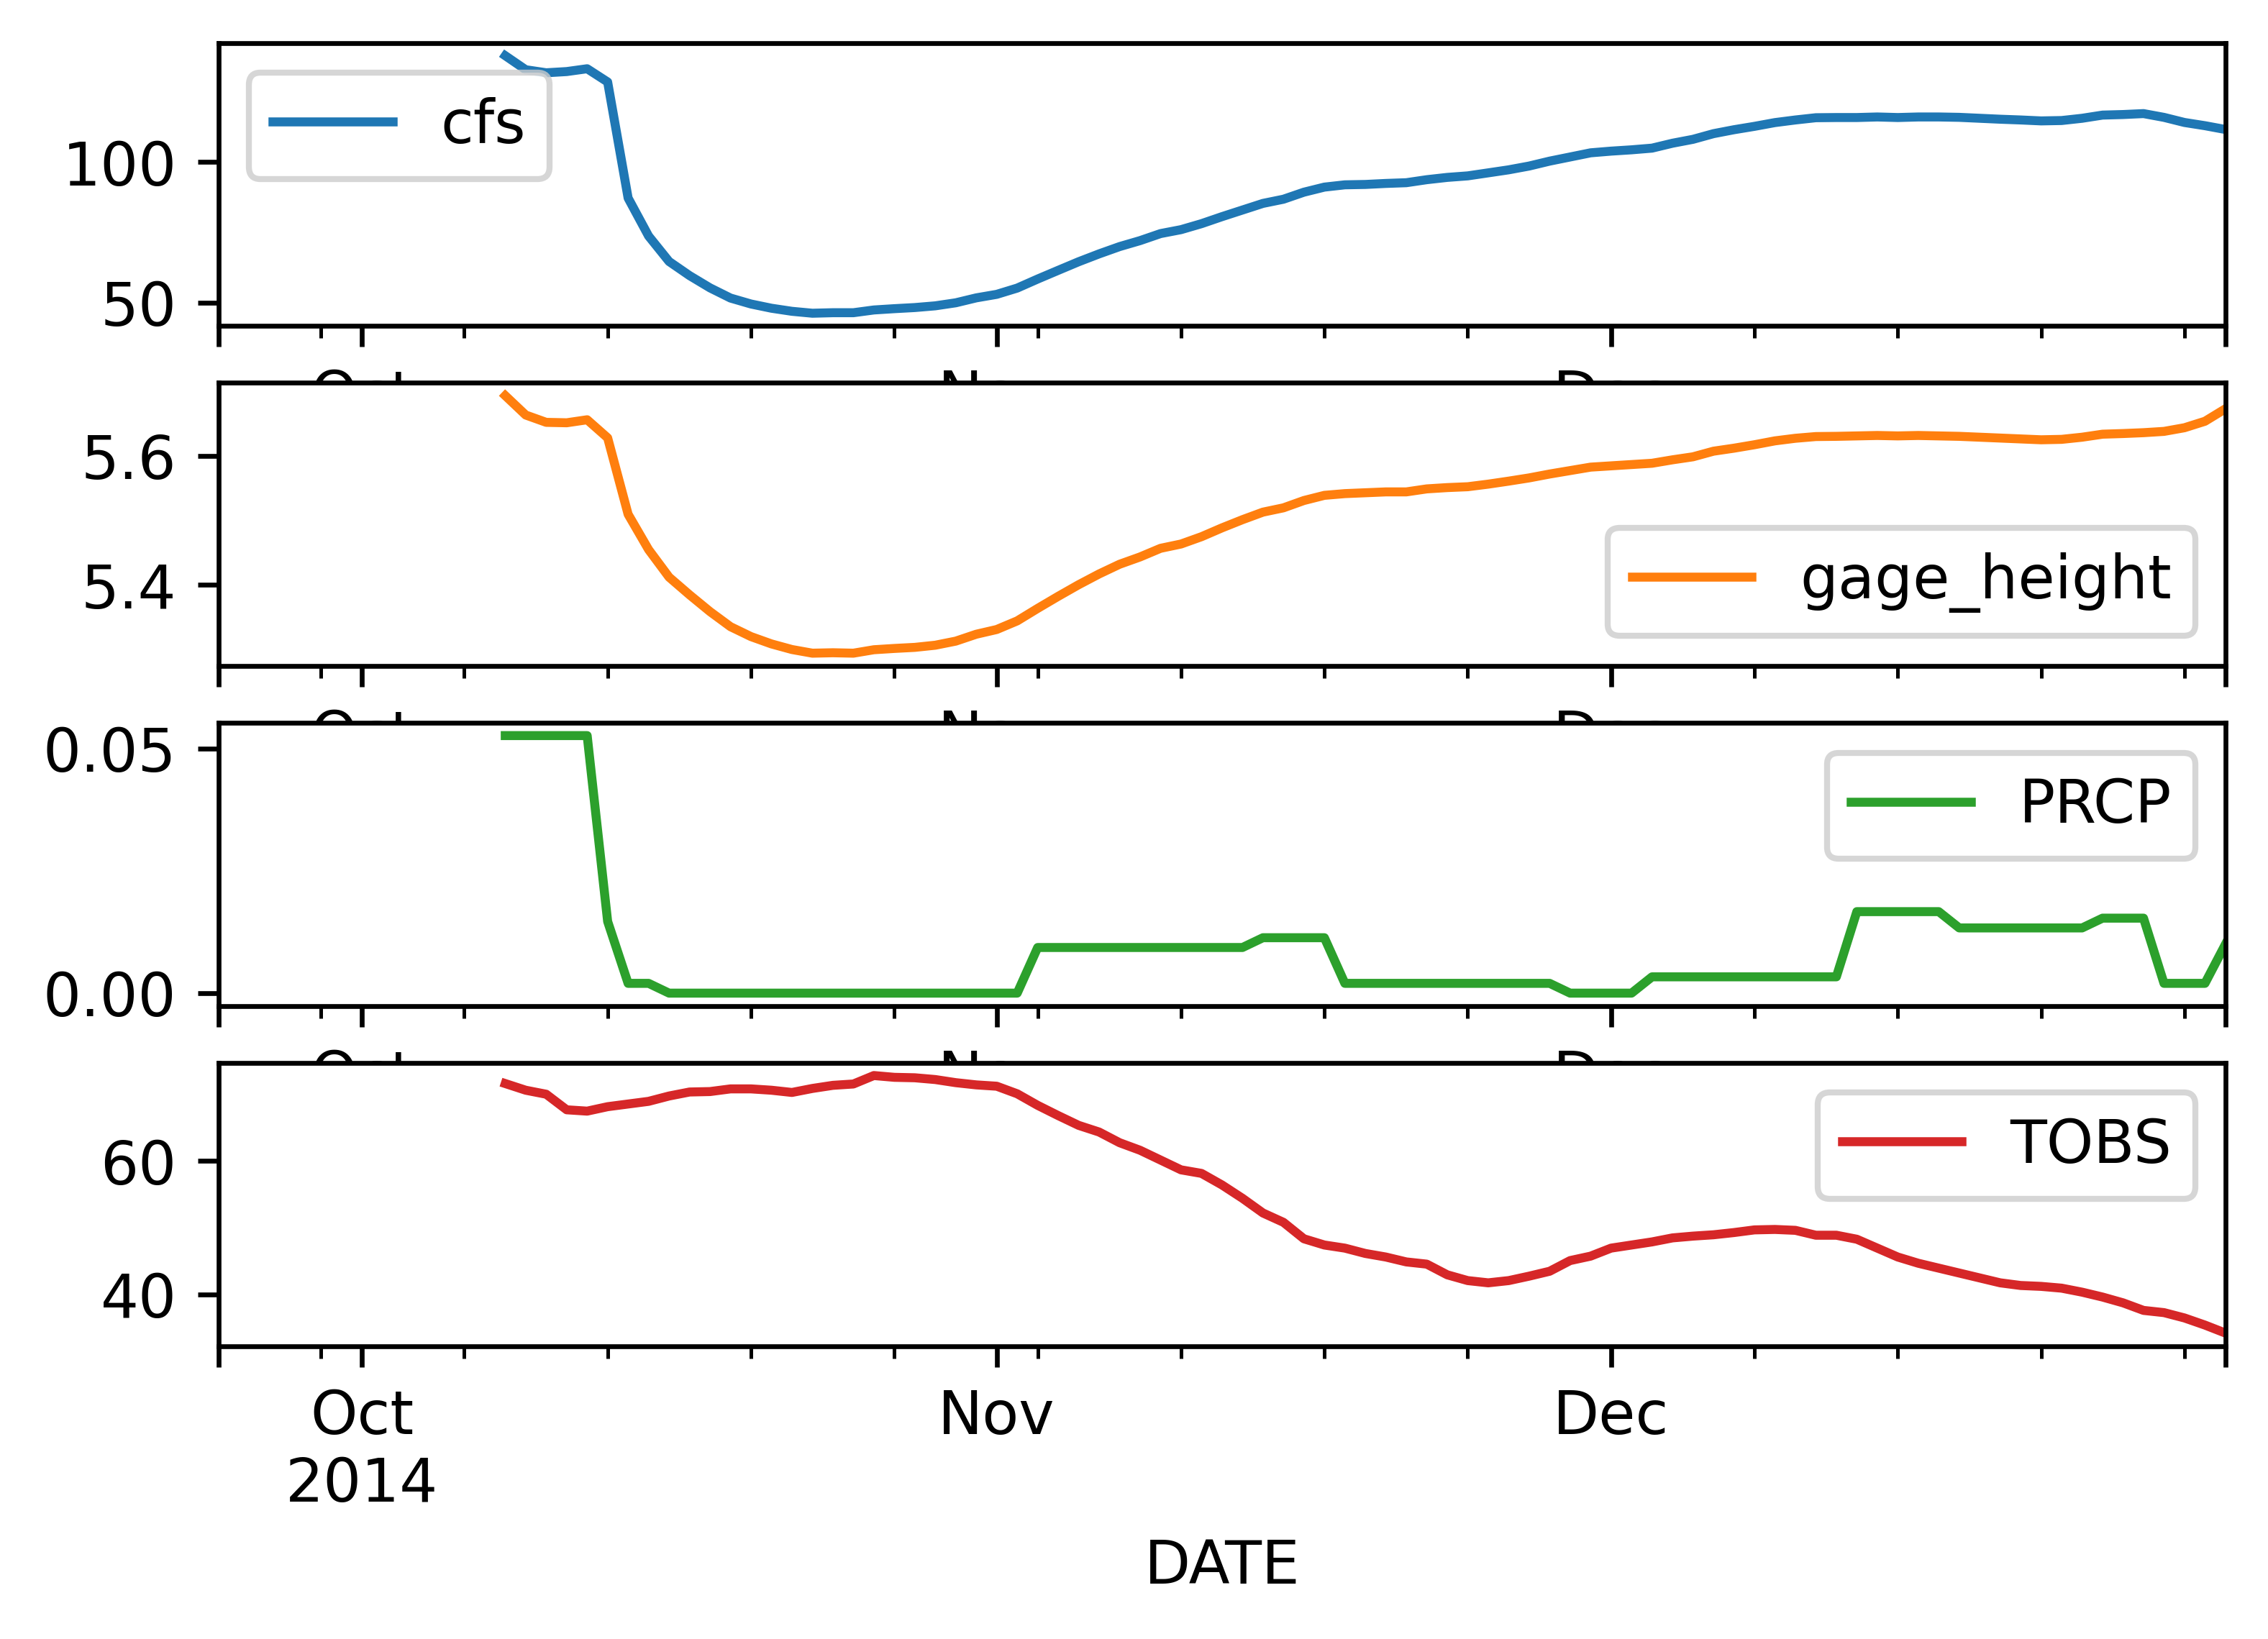

In [46]:
fig, ax = plt.subplots(dpi=600)

(
    cleaned_df
    .resample('D')
    .median()
    .merge(temp_df, left_index=True, right_on='DATE', how='inner', validate='1:1')
    .set_index('DATE')
    .loc['2014', ['cfs', 'gage_height', 'PRCP', 'TOBS']]
    # Intepolate missing values
    .interpolate()
    # Rolling
    .rolling(15)
    # Find the mean
    .mean()
    .plot(subplots=True, ax=ax)
);

C:\Users\INNO\AppData\Local\Temp\ipykernel_17692\2196244214.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.median is deprecated. In a future version, a TypeError will be raised. Before calling .median, select only columns which should be valid for the function.
  cleaned_df


<AxesSubplot:xlabel='cfs', ylabel='TOBS'>

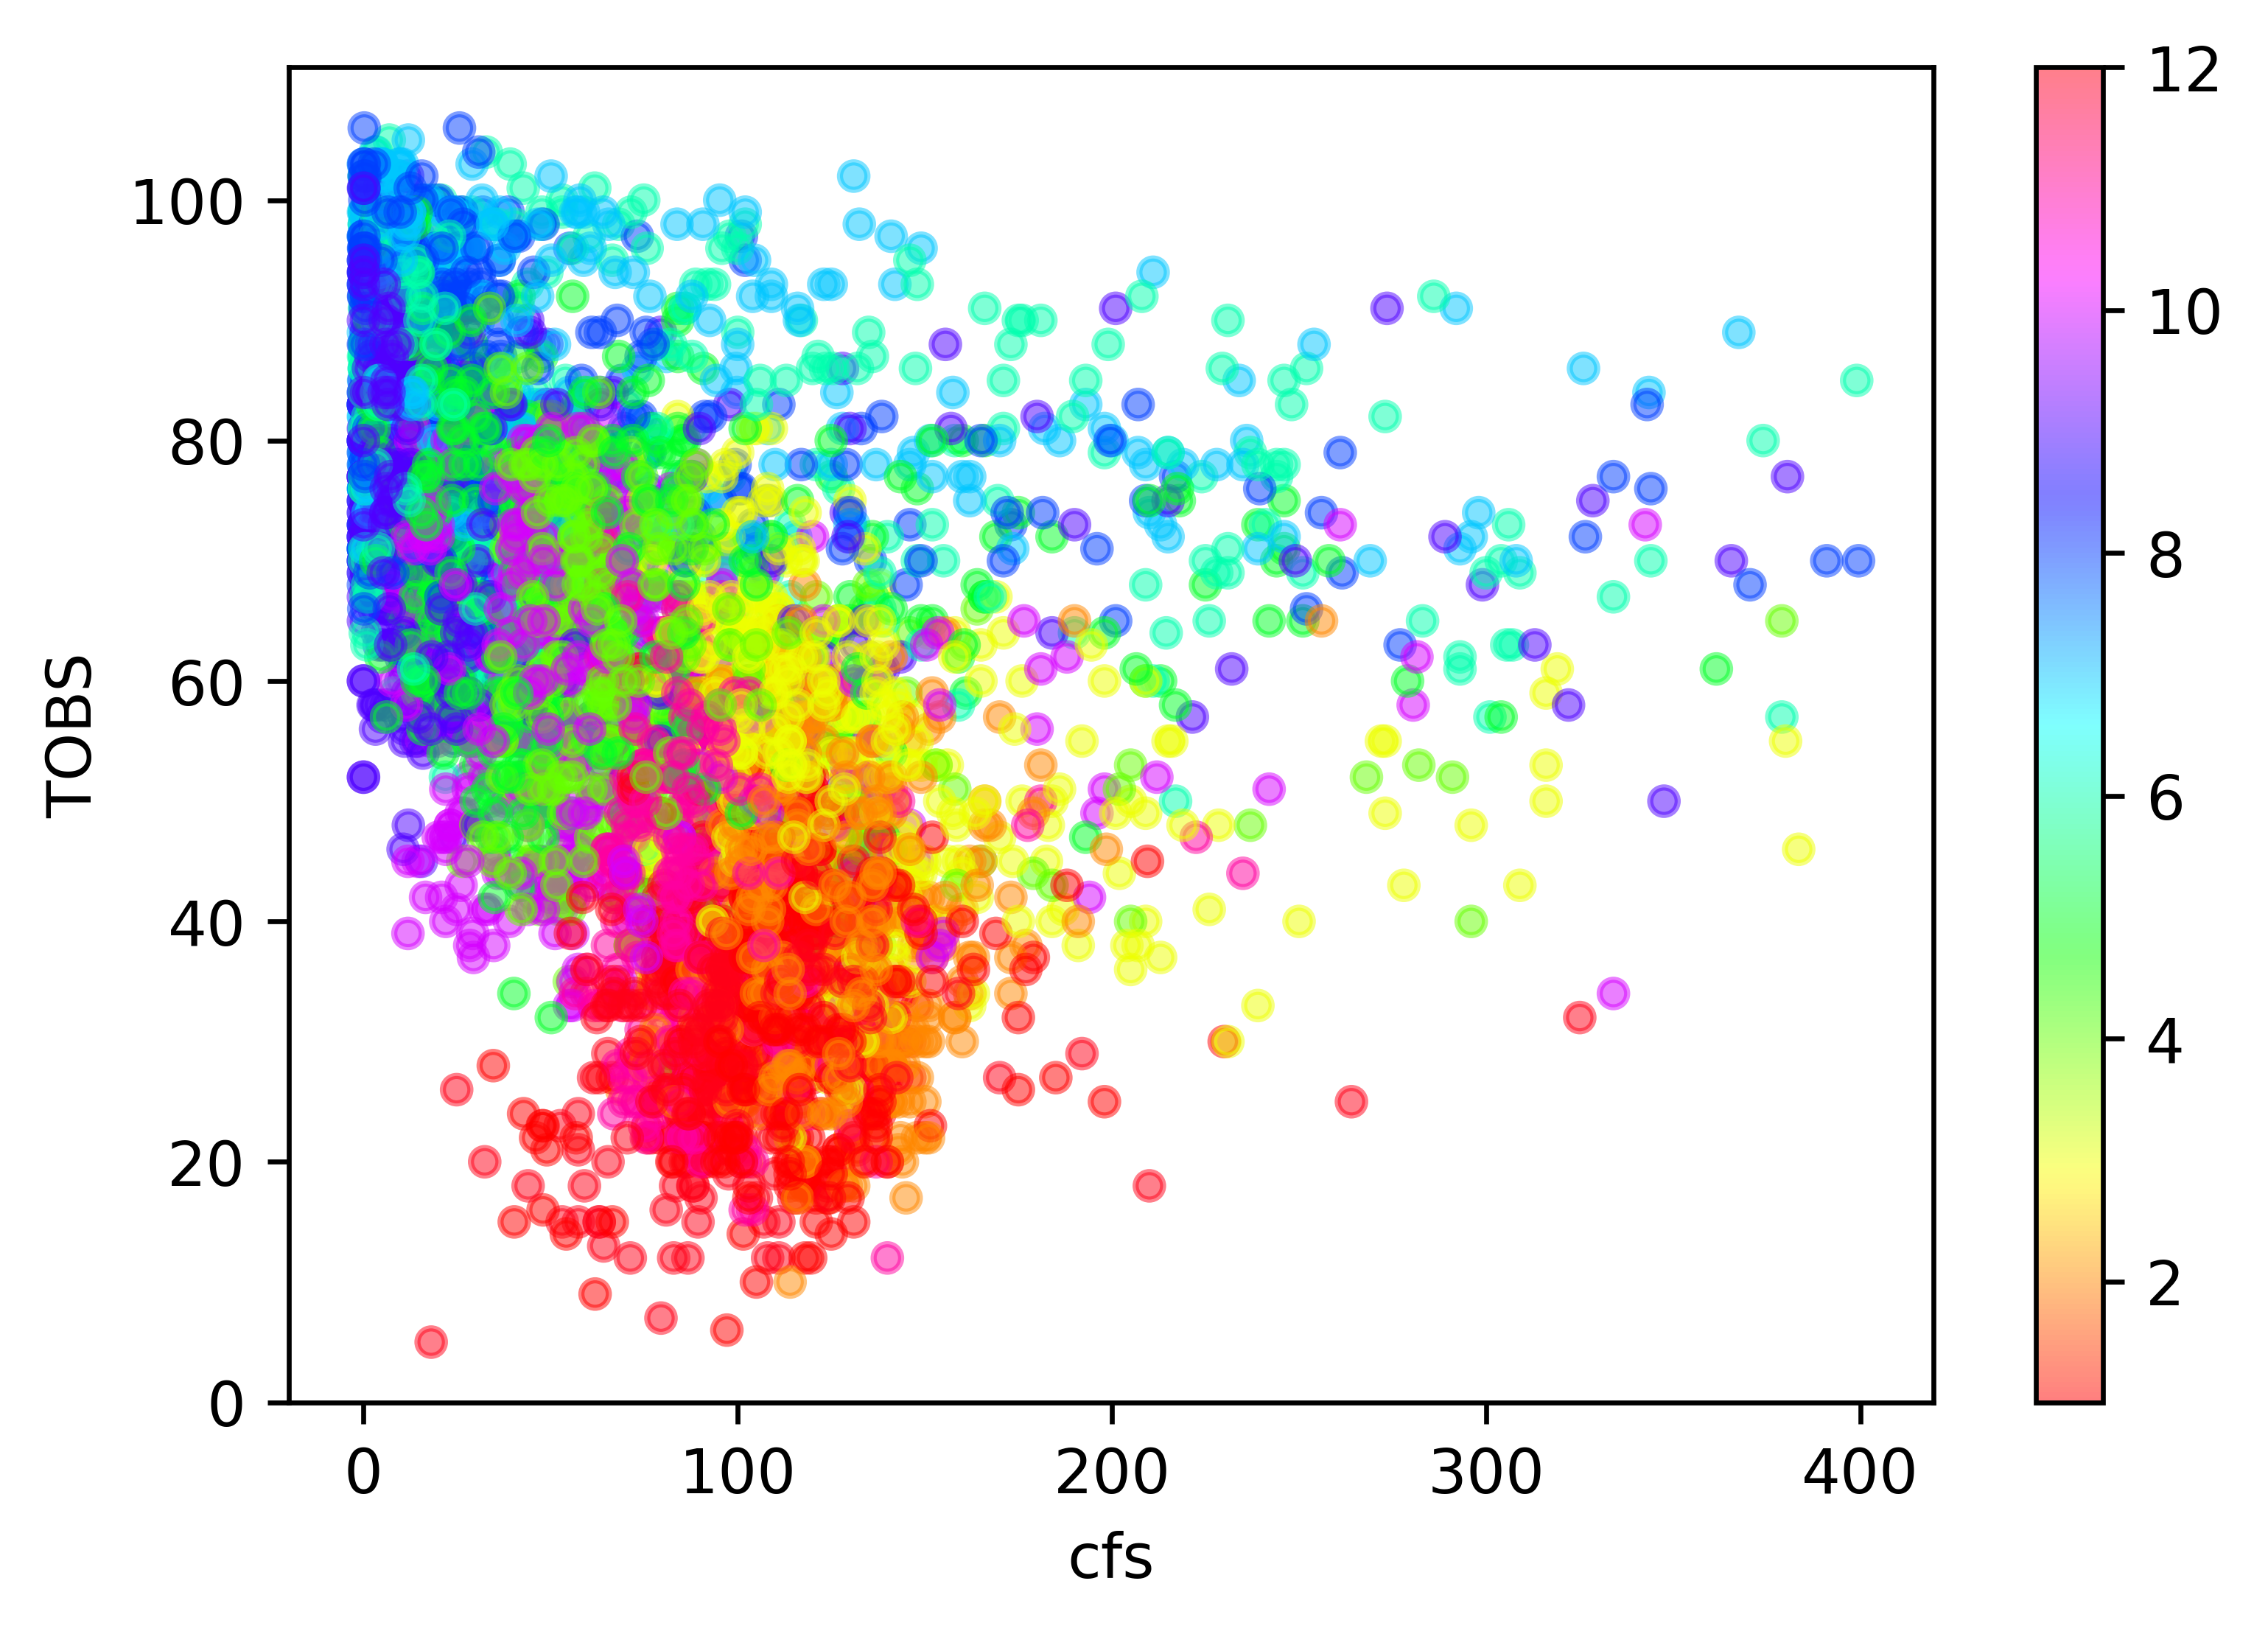

In [47]:
fig, ax = plt.subplots(dpi=600)

dd2 = (
    cleaned_df
    .resample('D')
    .median()
    .merge(temp_df, left_index=True, 
           right_on='DATE', how='inner', 
           validate='1:1')
    .query('cfs < 400')
)

(
    dd2
    .plot.scatter(x='cfs', y='TOBS', c=dd2['DATE'].dt.month,
                  ax=ax, cmap='hsv', alpha=0.5)
)